<a href="https://colab.research.google.com/github/formula008/S23_02_SW-AI-BigData_Mentoring/blob/main/07%EA%B0%95_(%ED%99%98%EA%B2%BD%EC%84%A4%EC%A0%95%EC%9A%A9)%ED%95%AB%ED%94%8C%EB%A0%88%EC%9D%B4%EC%8A%A4_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

들어가기 전에)
<br/>
11장은 코랩이 아닌 **주피터 노트북** 에서 진행해주세요

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/87_%EB%A1%9C%EB%93%9C%EB%A7%B5.png?raw=true' width=700>

# 1. 프로젝트 목표 수립


**핫플레이스, 언제 가야 가장 덜 붐빌까?**

그런데, 데이터가 있나?

### 1) 데이터 선정

데이터 : 구글에서 데이터를 찾아보자!

구글에 '서울 시간대별 인구 데이터' 검색

>
<br/>
>  

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/99_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%97%A4%EB%8D%94.png?raw=true' width=800>

### 2) 목표 수립하기

하위 목표 1 :



<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/93_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C1.png?raw=true' width=300>

하위 목표 2 :


<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/94_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C2.png?raw=true' width=300>

하위 목표 3 :

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/95_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C3.png?raw=true' width=300>

하위 목표 4 :

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/96_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C4.png?raw=true' width=300>

# 2. 프로그램 구현


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**프로젝트에 필요한 데이터 파일 읽기**

```
import csv

f = open('파일이름.csv', encoding='utf8') # 또는  'eur-kr', 'cp949'
data = csv.reader(f)
next(data)
data = list(data)
```
주의사항! 파이썬 파일과 데이터 파일을 같은 폴더에 위치시킨 후 코드 작성하기


In [2]:
# 인구데이터 파일 읽기
import csv

f = open('/content/drive/MyDrive/data/LOCAL_PEOPLE_DONG_202310.csv', encoding='utf8') # 또는  'eur-kr', 'cp949'
data = csv.reader(f)
next(data)
data = list(data)
print(len(data))

315456


In [3]:
# 행정동코드 데이터 파일 읽기
f2 = open('/content/drive/MyDrive/data/dong_code.csv', encoding = 'cp949')
code_data = csv.reader(f2)
next(code_data)
next(code_data)
code_data = list(code_data)
print(len(code_data))

424


In [4]:
# 인구데이터 확인해보기
print(data[0])

['20231001', '00', '11380530', '22734.252899999999', '360.9099', '224.83619999999999', '552.17790000000002', '598.92960000000005', '882.56949999999995', '836.17060000000004', '939.64890000000003', '822.58780000000002', '870.59910000000002', '842.64520000000005', '905.89229999999998', '860.71720000000005', '623.16409999999996', '1257.6643999999999', '558.50879999999995', '299.27600000000001', '451.48349999999999', '770.94569999999999', '811.85659999999996', '862.15070000000003', '873.90380000000005', '667.01509999999996', '1019.9621', '960.80579999999998', '1075.1080999999999', '1002.6932', '762.44759999999997', '2039.5830000000001', '']


**데이터타입 미리 변환하기**

인구수를 계량화하려면 연산이 필수!



인구데이터의 타입 변환하기


```
for row in data:
    row[1] = int(row[1])       # 시간대구분
    row[2] = int(row[1])       # 행정동코드
    row[3] = float(row[1])     # 총생활인구수
    row[4] = float(row[1])     # 남자0세부터9세생활인구수
    ...
    row[31] = float(row[31])   # 여자70세이상생활인구수

```



In [5]:
for row in data:
    for i in range(1, 32):
        if i <= 2:      # 인덱스가 2이하인 경우 정수형으로 변환
            row[i] = int(row[i])
        else:           # 인덱스가 2초과인 경우 실수형으로 변환
            row[i] = float(row[i])

print(data[0])

['20231001', 0, 11380530, 22734.2529, 360.9099, 224.8362, 552.1779, 598.9296, 882.5695, 836.1706, 939.6489, 822.5878, 870.5991, 842.6452, 905.8923, 860.7172, 623.1641, 1257.6644, 558.5088, 299.276, 451.4835, 770.9457, 811.8566, 862.1507, 873.9038, 667.0151, 1019.9621, 960.8058, 1075.1081, 1002.6932, 762.4476, 2039.583, '']


코드 데이터의 타입 변환하기

In [6]:
# 프로젝트에서 사용할 예정인 행자부 행정동코드만 숫자로 변경
for row in code_data:
    row[1] = int(row[1])
print(code_data[0])

['1101053', 11110530, '서울', '종로구', '사직동']


**사용자에게 행정동명을 입력받고, 대응되는 행정동코드를 찾기**

```
1. 사용자에게서 행정동명을 입력받아 변수(dong_name)에 저장하기
2. 행정동코드 데이터(code_data)를 돌며 반복하기
  2-1. 행정동코드 데이터의 마지막 열인 행정동명(열 인덱스[-1])이 입력된 행정동명(dong_name)과 같다면
    2-1-1. 해당하는 행정동코드를 변수(dong_code)에 저장하기
```



In [7]:
dong_name = input('핫플레이스가 위치한 행정동을 입력하세요 --> ')
for row in code_data:
    if row[-1] == dong_name:
        dong_code = row[1]

print(dong_name, '-',dong_code, '을(를) 분석합니다!')

핫플레이스가 위치한 행정동을 입력하세요 --> 압구정동
압구정동 - 11680545 을(를) 분석합니다!


## 하위목표 1  :  핫플레이스가 있는 행정동의 시간대별 평균인구 그래프 그려 분석하기


<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/93_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C1.png?raw=true' width=200>
<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/97_%EC%9D%B8%EA%B5%AC%EB%A6%AC%EC%8A%A4%ED%8A%B8.png?raw=true' width=600>

<br/>
<br/>

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/98_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C1%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.png?raw=true' width=800>

# 1) 알고리즘 작성
1. 시간대별 평균인구를 저장할 리스트(population)를 길이 24로 만들고 초깃값 0 저장하기
2. 인구 데이터(data)의 첫 행부터 마지막 행까지 돌며 반복하기
  
  2.1 사용자가 입력한 행정동의 행정동코드(dong_code)와 인구 데이터(data)의 행정동코드(row[2])가 같다면

    - 2.1.1 해당 행의 시간대(row[1])와 총생활인구수(row[3])를 각각 변수(time, p)에 저장하기

    - 2.1.2 과정 2.1.1에서 저장한 시간대(time)가 population의 인덱스이므로 population[time]에 총생활인구수(p) 더하기
3. 반복이 끝나면 population 리스트의 모든 값을 31로 나눈 후 population에 다시 저장하기
4. 완성된 population 리스트로 시간대별 평균인구 그래프 그리기


### 2) 코드 작성하기


In [ ]:
population = []
for i in range(24):
    population.append(0)

for row in data:
    if row[2] == dong_code:
        time = row[1]
        p = row[3]
        population[time] += p

print(population)    # 현재 population은 총인구, 31로 나누어야 평균인구가 됨


**추가로 배워봅시다!**

1) 리스트 내포

```
population = []
for i in range(24):
    population.append(0)
```
코드라인 세줄 -> 한 줄


```
population = [0 for i in range(24)]
```




In [ ]:
# 리스트에 숫자 0을 24개 동시에 저장하기
population = [0 for i in range(24)]
print(population)

In [ ]:
# 리스트의 모든 원소를 31로 나누기
population = [p/31 for p in population]
print(population)

2) 변수 여러 개 코드라인 한 줄로 만들기

In [ ]:
apple, banana = 1200, 800
print(apple)
print(banana)

**추가로 배운 내용 적용하여 코드 간단하게 만들기**

In [ ]:
import matplotlib.pyplot as plt

population = [0 for i in range(24)]
for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        population[time] += p
population = [p/31 for p in population]

plt.rc('font', family='NanumGothic')
plt.title(dong_name + ' 시간대별 평균인구') # 그래프 제목
plt.plot(range(24), population, color='indigo') # 그래프 그리기
plt.xticks(range(24), range(24)) # x축 눈금
plt.xlabel('시간대') # x축 이름
plt.ylabel('평균인구수') # y축 이름
plt.show()


## 하위목표1의 결과분석

```
- 압구정동은 새벽 1~6시에 인구가 가장 적음
  (새벽에는 인구이동이 매우 적으므로 이 시간에 인구는 대부분 압구정에 거주하는 사람으로 추측할 수 있다.)
- 12~18시가 인구가 가장 많음
- 압구정동에 있는 핫플레이스를 가려면 10~11시쯤 브런치 약속이나 19시 이후 저녁약속을 잡으면 될 것 같다.
```




## 하위목표 2  :  핫플레이스가 있는 행정동의 주중/주말 시간대별 평균인구 그래프 그리고 분석하기


<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/94_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C2.png?raw=true' width=300>





**요일을 알려주는 datetime 라이브러리**
<br/>
0 - 월, 1 - 화, 2 - 수, 3 - 목, 4 - 금, 5 - 토, 6 - 일

In [ ]:
import datetime
datetime.date(2019, 12, 15).weekday()

###1) 알고리즘 작성
1. 주중 시간대별 생활인구를 저장할 리스트(weekday)와 주말 시간대별 생활인구를 저장할 리스트(weekend)를 길이 24로 만들고 초깃값 0 저장하기
2. 인구 데이터(data)의 첫 행부터 마지막 행까지 돌며 반복하기
  
  2.1 사용자가 입력한 행정동의 행정동코드(dong_code)와 인구 데이터(data)의 행정동코드(row[2])가 같다면
    
    - 2.1.1 해당 행의 시간대(time)와 총생활인구수(p), 기준일ID의 연도(year), 월(mon), 일(day)을 각각 변수에 저장하기
    - 2.1.2 과정 2.1.1에서 저장한 연도(year), 월(mon), 일(day)을 datetime.date().weekday()에 넣어 주중/주말 구분하기
    - 2.1.3 주중이면 주중 리스트(weekday[time])에 총생활인구수(p), 주말이면 주말 리스트(weekend[time])에 총생활인구수(p) 더하기

 **주중인구와 주말인구의 평균을 구하기 위해 2019년 12월의 주중일수와 주말일수를 알아야 함 (3~4) **
3. 2019년 12월의 주중 일수(weekday_cnt)와 주말 일수(weekend_cnt)를 저장할 변수를 만들고 초깃값 0 저장하기
4. 2019년 12월의 일수만큼 반복하기
  4.1 datetime.date(2019, 12, i)가 주중이면 주중 일수(weekday_cnt)에 1, 주말이면 주말 일수(weekend_cnt)에 1 더하기
5. 주중 리스트(weekday)의 각 요소를 주중 일수(weekday_cnt)로, 주말 리스트(weekend)의 각 요소를 주말 일수(weekend_cnt)로 나누어 주중/주말 평균인구 구하기
6. 완성된 weekday와 weekend 리스트로 주중/주말 시간대별 평균인구 그래프 그리기

### 2) 코드 작성하기

In [22]:
weekday = [0 for i in range(24)]
weekend = [0 for i in range(24)]

for row in data:
    if row[2] == dong_code:
        time, p = row[1], row[3]
        year, mon, day = int(row[0][:4]), int(row[0][4:6]), int(row[0][6:])
        num = datetime.date(year, mon, day).weekday()
        if num < 5:
            weekday[time] += p
        else:
            weekend[time] += p

In [23]:
# 2023년 10월의 주중/주말 일수 구하기
weekday_cnt, weekend_cnt = 0, 0
for i in range(1, 32):
    if datetime.date(2019,12,i).weekday() < 5:
        weekday_cnt += 1
    else:
        weekend_cnt += 1

print('2023년 10월의 주중 일수 =', weekday_cnt, '주말 일수 =',weekend_cnt)

weekday = [w/weekday_cnt for w in weekday]
weekend = [w/weekend_cnt for w in weekend]

2023년 10월의 주중 일수 = 22 주말 일수 = 9


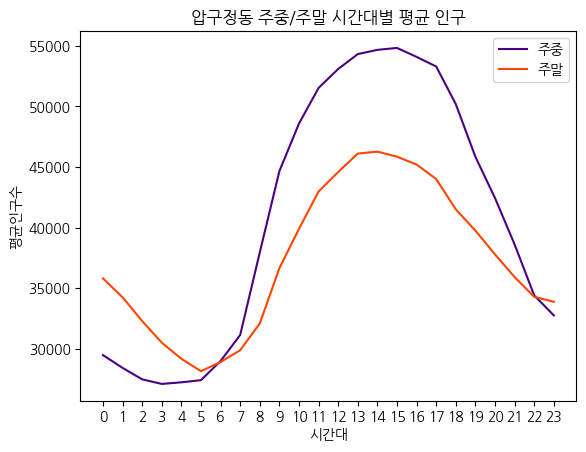

In [24]:
plt.rc('font', family='NanumGothic')
plt.title(dong_name + ' 주중/주말 시간대별 평균 인구')
plt.plot(range(24), weekday, color = 'indigo', label='주중')
plt.plot(range(24), weekend, color = 'orangered', label ='주말')
plt.legend()
plt.xlabel('시간대')
plt.ylabel('평균인구수')
plt.xticks(range(24), range(24))
plt.show()

## 하위목표2의 결과분석

```
- 압구정동은 주말보다 주중 인구가 더 많다.
- 주말에 압구정에 간다면 그리 걱정하지 않아도 된다.
```




## 하위목표 3  :  핫플레이스가 있는 행정동의 남/녀 시간대별 평균인구 그래프 그리고 분석하기


<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/95_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C3.png?raw=true' width=300>

<br/>
<br/>
## 하위목표 3  :  핫플레이스가 있는 행정동의 남/녀 시간대별 평균인구 그래프 그리고 분석하기
<br/>

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/95_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C3.png?raw=true' width=300>

<br/>
<br/>

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/123_%E1%84%92%E1%85%A1%E1%86%BA%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%89%E1%85%B3%20%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B33-1.png?raw=true' width=750>

<br/>
<br/>

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/124_%E1%84%92%E1%85%A1%E1%86%BA%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%89%E1%85%B3%20%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B33-2.png?raw=true' width=750>

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/125_%E1%84%92%E1%85%A1%E1%86%BA%E1%84%91%E1%85%B3%E1%86%AF%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%89%E1%85%B3%20%E1%84%91%E1%85%B3%E1%84%85%E1%85%A9%E1%84%8C%E1%85%A6%E1%86%A8%E1%84%90%E1%85%B33-3.png?raw=true' width=750>



### 1) 알고리즘 작성


```
1. 남성 시간대별 생활인구를 저장할 리스트(male)와 여성 시간대별 생활인구를 저장할 리스트(female)를 길이 24로 만들고 초깃값 0 저장하기
2. 인구 데이터(data)의 첫 행부터 마지막 행까지 돌며 반복하기
  2.1 사용자가 입력한 행정동의 행정동코드(dong_code)와 인구 데이터(data)의 행정동코드(row[2])가 같다면
    2.1.1 해당 행의 시간대(열 인덱스 [1])를 변수(time)에 저장하기
    2.1.2 열 인덱스 [4]부터 [17]까지의 합을  male[time]에 더하기
    2.1.3 열 인덱스 [18]부터 [31]까지의 합을 female[time]에 더하기
3. 반복이 끝나면 남성 생활인구 리스트(male)와 여성 생활인구 리스트(female)를 각각 31로 나누어 시간대별 평균인구 구하기
4. 완성된 male과 female 리스트로 시간대별 평균인구 그래프 그리기
```



### 2) 코드 작성하기

## 하위목표3의 결과분석

```
- 압구정동에는 여성이 남성보다 항상 더 많다.
- 남성 인구의 증감폭보다 여성 인구의 증감폭이 더 크다.
- 만약 압구정동의 여성이 선호하는 핫플레이스라면 점심시간에 붐빌수도 있다.
```




## 하위목표 4  :  핫플레이스가 있는 행정동과 익숙한 행정동의 시간대별 평균인구 그래프 그려서 비교 분석하기

<img src='https://github.com/teacher-jiejie/allinone_AI/blob/images/96_%ED%95%AB%ED%94%8C_%ED%95%98%EC%9C%84%EB%AA%A9%ED%91%9C4.png?raw=true' width=300>





### 1) 알고리즘 작성

```
1. 사용자에게서 행정동명을 입력받아 행정동코드를 구한 후 이 값을 dong_code에 저장하기
2. 비교할 행정동명을 입력받아 행정동코드를 구한 후 이 값을 dong_code2에 저장하기
3. 핫플레이스의 행정동 인구를 저장할 리스트(population)와 비교할 행정동 인구를 저장할 리스트(population2)를 길이 24로 만들고 초깃값 0 저장하기
4. 인구 데이터(data)의 첫 행부터 마지막 행까지 돌며 반복하기
  4.1 사용자가 입력한 행정동의 행정동코드(dong_code)와 인구 데이터(data)의 행정동코드(row[2])가 같다면
    4.1.1 해당 행의 시간대(row[1])와 총생활인구수(row[3])를 각각 변수(time, p)에 저장하기
    4.1.2 인덱스가 time인 population 리스트의 요소(population[time])에 총생활인구수(p)를 더하기
4.2 비교할 행정동의 행정동코드(dong_code2)와 인구 데이터(data)의 행정동코드(열 인덱스 [2])가 같다면
    4.2.1 해당 행의 시간대(열 인덱스[1])와 총생활인구수(열 인덱스[3])를 각각 변수(time, p)에 저장하기
    4.2.2 인덱스가 time인 population2 리스트의 요소(population2[time])에 총생활인구수(p)를 더하기
5. 반복이 끝나면 두 리스트(population, population2)의 모든 값을 31로 나누어 다시 저장하기
6. 완성된 리스트로 두 지역의 시간대별 평균인구 그래프 그리기
```


### 2) 코드 작성하기

In [18]:
# 핫플레이스가 있는 행정동


# 비교할 행정동



핫플레이스가 위치한 행정동을 입력하세요 --> 압구정동
비교할 행정동을 입력하세요 --> 역삼2동


## 하위목표4의 결과분석

```
- 인구이동이 적은 새벽 인구가 해당 동에 거주하는 인구라 가정한다면, 역삼 2동이 압구정동보다 거주 인구가 많다.
- 인구 이동은 역삼 2동보다 압구정동이 더 많다.
- 대부분의 시간에는 역삼2동의 인구가 더 많지만 17~20시 사이에는 압구정동이 더 많다.
- 17~20시에는 역삼2동으로, 그 외 시간대에는 압구정동으로 가는 것이 사람이 덜 붐빈다.
```


